<a href="https://colab.research.google.com/github/Iceoid/datascience-ml-class/blob/main/TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Random Dataset Generation
We will generate random, noisy dataset using a predefined function. This function is a combination of a 2nd degree polynomial with a sine function, plus some noise.

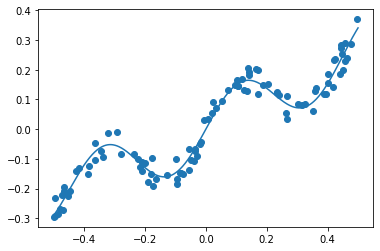

In [ ]:
def synthetic_function(x, noise=0):
    return (x + (x+2)**2 + np.sin(14*x) + noise * (np.random.random(x.shape) - 0.5)) / 10 - 0.4

def get_data_range(min=-0.5, max=0.5, num=1000, noise=0):
    X = np.linspace(min, max, num=num).reshape((num, 1))
    return X, synthetic_function(X, noise)

def get_data_random(min=-0.5, max=0.5, num=100, noise=1):
    X = np.random.random(size=(num, 1)) * (max - min) + min
    return X, synthetic_function(X, noise)

np.random.seed(12)
X, Y = get_data_random()
Xr, Yr = get_data_range()
plt.scatter(X, Y)
plt.plot(Xr, Yr)
plt.show()

## Fully Connected Neural Network (MLP)
Implement the forward pass (`Dense.forward`) and the backward pass (`Dense.backward`) of a fully connected neural network layer.

In [ ]:
def homogeneous(X):
    return np.insert(X, 0, values=1, axis=-1)

# Default Layer Class
class Layer:
    def __init__(self, input_size=None, output_size=None):
        self.input_size = input_size
        self.output_size = output_size
        self.prev = None
        self.next = None
    def __call__(self, callable_graph):
        if isinstance(callable_graph, Layer):
            self.prev = callable_graph
            self.input_size = callable_graph.output_size
            callable_graph.next = self
            if self.output_size is None:
                self.output_size = self.input_size

            return self
        return self.predict(callable_graph)
    
    def predict(self, X):
        return self.forward(X) if self.next is None else self.next.predict(self.forward(X))
        
    def backprop(self, Y):
        return self.backward(Y) if self.prev is None else self.prev.backprop(self.backward(Y))
        
    def str_chain(self):
        return str(self) if self.next is None else str(self) + " -> " + self.next.str_chain()

# Fully Connected Layer Class
class Dense(Layer):
    def __init__(self, units, input_size=None):
        Layer.__init__(self, input_size, units)
        self.W = None
        
    def init_weights(self):
        self.W = np.random.normal(0, scale=2/(self.input_size), size=(self.output_size, self.input_size + 1))
        
    # Forward pass using X
    def forward(self, X):
        if self.W is None:
            self.init_weights()

        Xh = homogeneous(X) # Homogeneous coordinates
        self.last_input = Xh # Save inputs for backpropagation

        #Compute forward pass result
        return # ----- TODO -----
    
    # Backward pass using Y
    def backward(self, Y):
        #Compute gradient
        input_3d = np.swapaxes(np.expand_dims(self.last_input, axis=0), 0, 1)
        y_t_3d = np.transpose(np.swapaxes(np.expand_dims(Y, axis=0), 0, 1), (0, 2, 1))
        self.grad = np.mean(y_t_3d * input_3d, axis=0)
        
        #Compute backward pass result, don't forget to remove the bias term! Bias does not need to be backpropagated.
        return # ----- TODO -----
        
    def __str__(self):
        return "Dense(" + str(self.input_size) + ", " + str(self.output_size) + ")"

class ReLU(Layer):
    def forward(self, X):
        self.last_input = X # Save inputs for backpropagation
        return np.maximum(X, 0)

    def backward(self, Y):
        return Y * np.maximum(np.sign(self.last_input), 0)

    def __str__(self):
        return "ReLU(" + str(self.input_size) + ")"
    

Let's initialize a neural network network with 2 hidden layers and ReLU activations.

In [ ]:
inputs = Dense(64, input_size=1)
x = inputs
x = ReLU()(x)
x = Dense(64)(x)
x = ReLU()(x)
x = Dense(1)(x)
outputs = x

inputs.str_chain()

'Dense(1, 64) -> ReLU(64) -> Dense(64, 64) -> ReLU(64) -> Dense(64, 1)'

 * Use batch gradient descent to train the network until MSE drops below $0.001$, then plot the predicted function, what do you observe?

 * Knowing the combination of ReLU is a peicewise linear function, is the predicted function similar?

 * Separate the dataset into train-validate-test. Train the network until validation loss is lowest. What is the final MSE on the test dataset?

In [ ]:
lr = 0.1

for i in range(40000):

    # Forward step
    Yp = inputs.predict(X)

    # Compute error and output gradient
    dE = Yp - Y
    E = np.mean(dE ** 2)

    if i % 1000 == 0:
        print("MSE:", E)

    if E < 0.001: # If MSE is small, stop
        print("MSE:", E)
        break

    # Backprop
    outputs.backprop(dE)

     # ----- TODO -----
     # Update the weights (layer.W) for every trainable layer using the gradient (layer.grad)

plt.scatter(X, Y)
plt.plot(Xr, inputs.predict(Xr))

You can use the neural network module in Scikit-Learn if the following is too difficult to implement yourself. 

 * This time change the activation functions (use the other activations except ReLU). What is the shape of the predicted function? Is it different from the network trained with ReLU activations?

 * Change and play around with the number of hidden layers and neurons per hidden layer. What do you observe?